<a href="https://colab.research.google.com/github/SaiManjithMatta/Assignment_3/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**(Titanic Dataset)**
1. Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class.

          a. Do you think we should keep this feature?
2. Do at least two visualizations to describe or show correlations.
3. Implement Naïve Bayes method using scikit-learn library and report the accuracy.

In [19]:
# importing the data
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing (feature vector into representation)
from sklearn import preprocessing

#Mounting to the drive for reading the data
from google.colab import drive
drive.mount('/content/gdrive')

#ignoring warnings
import warnings as w
w.filterwarnings("ignore")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
#reading file using pandas
train_df = pd.read_csv('gdrive/My Drive/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
#relation between sex and survived
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**   a. Do you think we should keep this feature?**

This feature gives the mathematical relation between thwo variables which helps for the comparision.

In [22]:
# Correlation between the columns sex and survived.
le = preprocessing.LabelEncoder()
 #scaling the traing data
train_df['Sex'] = le.fit_transform(train_df.Sex.values)
 #finding correlation.
train_df['Survived'].corr(train_df['Sex'])

-0.5433513806577555

In [23]:
# Matrix representation of correlation of entire data
Mx = train_df.corr()
print(Mx)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex         -0.245489 -0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

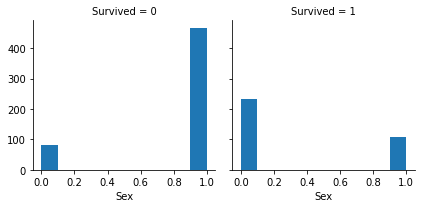

In [24]:
#1.2
# two visualizations to describe or show correlations
# Histogram
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=10)

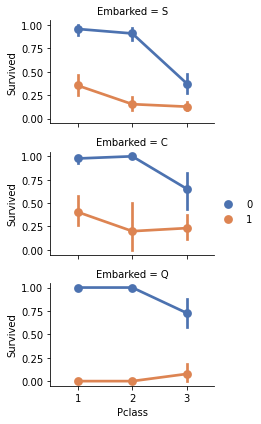

In [25]:
#pointplot
grid = sns.FacetGrid(train_df, row='Embarked', size=2.0, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [42]:
#Normal corelation for entire data
train_df.corr().style.background_gradient(cmap="Reds")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


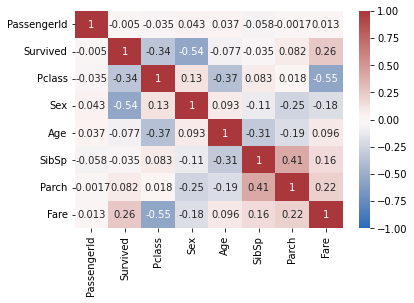

In [27]:
# Heatmap
sns.heatmap(Mx, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag') #plot of rectangular data as a color encoded matrix
plt.show()

In [43]:
# Implementing Naïve Bayes method using scikit-learn library and reporting the accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


train = pd.read_csv('gdrive/My Drive/train.csv')
test = pd.read_csv('gdrive/My Drive/train.csv')

# Join data to analyse and process the set as one.
train['train'] = 1
test['train'] = 0
df = train.append(test, sort=False)


features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

df = df[features + [target] + ['train']]

# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')

train.dropna(axis=0, inplace=True)
labels = train[target].values
train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)

#splitting of training and testing data
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=0)

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

#training the data
classifier.fit(X_train, y_train)

#evaluate the data
y_pred = classifier.predict(X_test)

# classification
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        82
           1       0.75      0.66      0.70        61

    accuracy                           0.76       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

[[69 13]
 [21 40]]
accuracy is 0.7622377622377622


**(Glass Dataset)**
1. Implement **Naïve Bayes** method using scikit-learn library.
a. Use the glass dataset available in Link also provided in your assignment.
b. Use train_test_split to create training and testing part.
2. Evaluate the model on testing part using score and
 

1. Implement **linear SVM** method using scikit library
a. Use the glass dataset available in Link also provided in your assignment.
b. Use train_test_split to create training and testing part.
2. Evaluate the model on testing part using score and


Do at least two visualizations to describe or show correlations in the Glass Dataset.

Which algorithm you got better accuracy? Can you justify why?

In [30]:
#1. Implementing Naïve Bayes method using scikit-learn library by using the glass dataset.
 
glass_df = pd.read_csv('gdrive/My Drive/glass.csv')
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [31]:
#coreleation
glass_df.corr().style.background_gradient(cmap="Reds")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [45]:
Fea_Vec = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Tar_Vec = 'Type'

#Train the model
x=glass_df.iloc[:,:-1].values
y=glass_df['Type'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.30, random_state = 0)

#evaluation
classifier = GaussianNB()
classifier.fit(x_train, y_train)


#Classification
y_pred = classifier.predict(x_test)

# Classification Report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.39      0.86      0.54        21
           2       0.50      0.12      0.19        26
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       0.88      1.00      0.93         7

    accuracy                           0.46        65
   macro avg       0.41      0.50      0.41        65
weighted avg       0.44      0.46      0.37        65

[[18  1  0  0  1  1]
 [21  3  1  1  0  0]
 [ 7  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]
accuracy is 0.46153846153846156


In [46]:
from sklearn.svm import SVC, LinearSVC

#Classification
classifier = LinearSVC()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

#Report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.52      0.76      0.62        21
           2       0.73      0.31      0.43        26
           3       0.00      0.00      0.00         7
           5       0.25      1.00      0.40         2
           6       0.29      1.00      0.44         2
           7       1.00      0.14      0.25         7

    accuracy                           0.45        65
   macro avg       0.46      0.54      0.36        65
weighted avg       0.58      0.45      0.42        65

[[16  1  3  1  0  0]
 [10  8  3  3  2  0]
 [ 5  2  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  1  2  3  1]]
accuracy is 0.4461538461538462


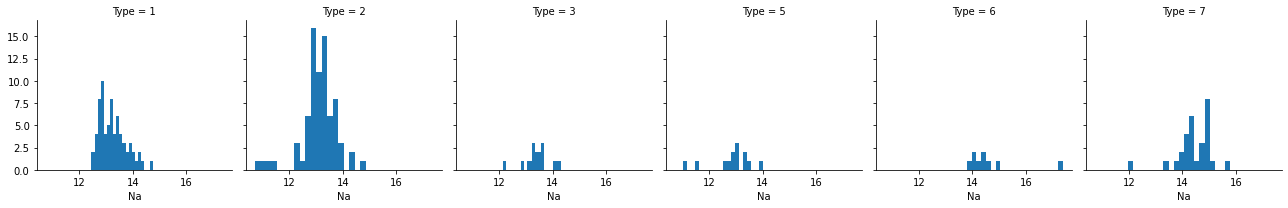

In [47]:
#Do at least two visualizations to describe or show correlations in the Glass Dataset
#Histogram
g = sns.FacetGrid(glass_df, col='Type')
g.map(plt.hist,'Na',bins=20)

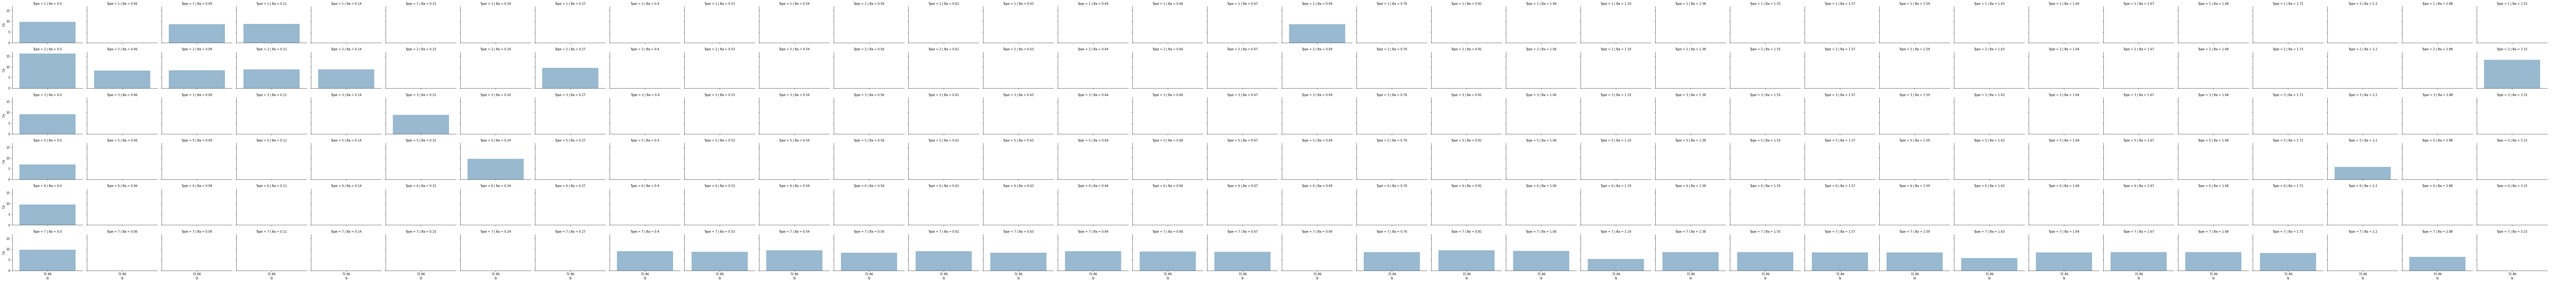

In [48]:
#barplot
grid = sns.FacetGrid(glass_df, row='Type',col='Ba',height=2.2,aspect=1.6)
grid.map(sns.barplot,'Si','Ca',alpha=.5,ci=None)
grid.add_legend()

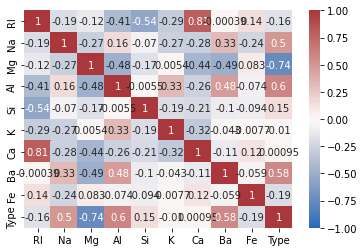

In [36]:
Mx2 = glass_df.corr()
sns.heatmap(Mx2, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

#Which algorithm you got better accuracy? Can you justify why?
Gaussian Naive Bayes algorithm gives better accuracy when compared to other algorithms.this is because, features are not discrete so used when features are not discrete.